In [2]:
import tensorflow as tf
print(tf.__version__)


2.7.0


In [3]:

import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
# import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.7.0


In [4]:
#  !pip install --upgrade tensorflow_hub

In [5]:
# from keras.layers import Dense,Flatten
# from keras.applications.vgg16 import VGG16

In [6]:
# pip install keras.applications.resnet50

In [7]:
# pip install keras.applications.VGG19

In [8]:
# conv_base = VGG16(
#     weights='imagenet',
#     include_top = False,
#     input_shape=(48,48,3)
# )

In [9]:
image_size=128
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
# datagen_train = ImageDataGenerator(horizontal_flip=True)
# datagen_validation = ImageDataGenerator(horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        "Train/",
        target_size=(image_size,image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True) 

validation_generator = test_datagen.flow_from_directory(
        "Test/",
        target_size=(image_size,image_size),
        batch_size=batch_size,
        class_mode='categorical',
         shuffle=True)

Found 5234 images belonging to 6 classes.
Found 1210 images belonging to 6 classes.


In [69]:
print(validation_generator)

In [11]:
from tensorflow.keras.applications import VGG19
from keras.models import Model
import keras
base_model = VGG19(include_top=False, weights='imagenet', input_shape=(image_size,image_size,3))

In [12]:
from tensorflow.keras.applications import VGG19
from keras.models import Model
import keras
base_model = VGG19(include_top=False, weights='imagenet', input_shape=(image_size,image_size,3))
# output = restnet.layers[-1].output
# output = keras.layers.Flatten()(output)
# restnet = Model(restnet.input, output=output)
for layer in base_model.layers:
    layer.trainable = False
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [50]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from tensorflow.keras import optimizers

model = Sequential()

model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu', input_dim=image_size))
model.add(Dropout(0.3))
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 512)               4194816   
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [51]:
# opt = Adam(learning_rate=0.0005)
# model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [52]:
# !pip install pydot

In [53]:
# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
# Image('model.png',width=400, height=200)

In [54]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from livelossplot import PlotLossesKerasTF

In [55]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.0002, mode='auto')
checkpoint = ModelCheckpoint("VGG19_old.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr]

In [56]:
# history = model.fit(
#     x=train_generator,
#     steps_per_epoch=steps_per_epoch,
#     epochs=epochs,
#     validation_data = validation_generator,
#     validation_steps = validation_steps
# )

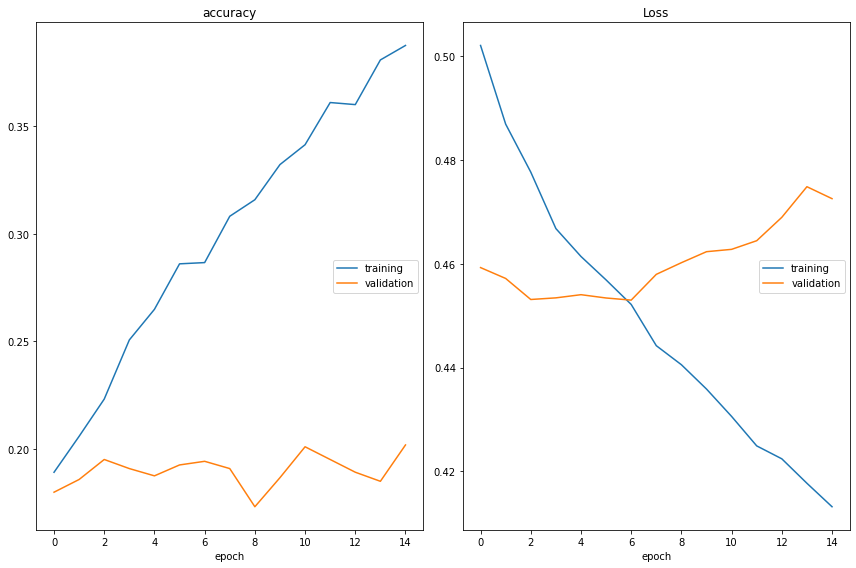

accuracy
	training         	 (min:    0.189, max:    0.388, cur:    0.388)
	validation       	 (min:    0.173, max:    0.202, cur:    0.202)
Loss
	training         	 (min:    0.413, max:    0.502, cur:    0.413)
	validation       	 (min:    0.453, max:    0.475, cur:    0.473)

Epoch 00015: saving model to VGG19_old.h5
163/163 [==============================] - 20s 125ms/step - loss: 0.4132 - accuracy: 0.3875 - val_loss: 0.4726 - val_accuracy: 0.2019 - lr: 2.0000e-05


In [58]:
history = model.fit(
       x=train_generator, 
                    steps_per_epoch=train_generator.n//train_generator.batch_size, 
                    epochs=15,
                    validation_data=validation_generator, 
                    validation_steps= validation_generator.n//validation_generator.batch_size, 
                    verbose=1,
                    callbacks=callbacks
                              )

In [59]:
model.save("VGG19_old")

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on

In [60]:
model_json = model.to_json()
with open("model.json_vgg19", "w") as json_file:
    json_file.write(model_json)

In [61]:
from tensorflow.keras.preprocessing import image

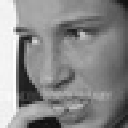

In [62]:
imageFolder = './Test/angry/'
filePath = imageFolder + 'Training_10018621.jpg'
image1 = image.load_img(filePath, target_size = (128,128))
image1

In [63]:
transformedImage = image.img_to_array(image1)
print(transformedImage.shape)

(128, 128, 3)


In [64]:
print(transformedImage)

[[[243. 243. 243.]
  [243. 243. 243.]
  [243. 243. 243.]
  ...
  [ 17.  17.  17.]
  [ 17.  17.  17.]
  [ 17.  17.  17.]]

 [[243. 243. 243.]
  [243. 243. 243.]
  [243. 243. 243.]
  ...
  [ 17.  17.  17.]
  [ 17.  17.  17.]
  [ 17.  17.  17.]]

 [[243. 243. 243.]
  [243. 243. 243.]
  [243. 243. 243.]
  ...
  [ 17.  17.  17.]
  [ 17.  17.  17.]
  [ 17.  17.  17.]]

 ...

 [[240. 240. 240.]
  [240. 240. 240.]
  [240. 240. 240.]
  ...
  [ 97.  97.  97.]
  [ 97.  97.  97.]
  [ 97.  97.  97.]]

 [[240. 240. 240.]
  [240. 240. 240.]
  [240. 240. 240.]
  ...
  [ 97.  97.  97.]
  [ 97.  97.  97.]
  [ 97.  97.  97.]]

 [[240. 240. 240.]
  [240. 240. 240.]
  [240. 240. 240.]
  ...
  [ 97.  97.  97.]
  [ 97.  97.  97.]
  [ 97.  97.  97.]]]


In [65]:
import numpy as np
transformedImage = np.expand_dims(transformedImage, axis = 0)
transformedImage.shape

(1, 128, 128, 3)

In [66]:
from tensorflow.keras.applications.resnet50 import preprocess_input

In [67]:
transformedImage = preprocess_input(transformedImage)
transformedImage

array([[[[ 139.061   ,  126.221   ,  119.32    ],
         [ 139.061   ,  126.221   ,  119.32    ],
         [ 139.061   ,  126.221   ,  119.32    ],
         ...,
         [ -86.939   ,  -99.779   , -106.68    ],
         [ -86.939   ,  -99.779   , -106.68    ],
         [ -86.939   ,  -99.779   , -106.68    ]],

        [[ 139.061   ,  126.221   ,  119.32    ],
         [ 139.061   ,  126.221   ,  119.32    ],
         [ 139.061   ,  126.221   ,  119.32    ],
         ...,
         [ -86.939   ,  -99.779   , -106.68    ],
         [ -86.939   ,  -99.779   , -106.68    ],
         [ -86.939   ,  -99.779   , -106.68    ]],

        [[ 139.061   ,  126.221   ,  119.32    ],
         [ 139.061   ,  126.221   ,  119.32    ],
         [ 139.061   ,  126.221   ,  119.32    ],
         ...,
         [ -86.939   ,  -99.779   , -106.68    ],
         [ -86.939   ,  -99.779   , -106.68    ],
         [ -86.939   ,  -99.779   , -106.68    ]],

        ...,

        [[ 136.061   ,  123.221   ,  1

In [68]:
prediction = model.predict(transformedImage)
print(prediction)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[[3.1324340e-17 2.0381682e-11 2.4062338e-04 8.9485472e-13 1.8694351e-13
  1.4592896e-07]]


In [ ]:
# print(prediction.shape)

In [ ]:
# from tensorflow.keras.applications.resnet50 import decode_predictions
# predictionLabel = decode_predictions(prediction, top = 1)
# predictionLabel
# predictionLabel[0][0]

In [ ]:
# predictionLabel[0][0]

In [ ]:
# print('./Test/angry/Training_10018621.jpg/')

In [ ]:
# epochs = 25
# steps_per_epoch = train_generator.n//train_generator.batch_size
# validation_steps = validation_generator.n//validation_generator.batch_size

In [ ]:
# !pip install livelossplot

In [ ]:
# pip install --upgrade pip

In [ ]:
# from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
# from livelossplot import PlotLossesKerasTF

In [ ]:
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
#                               patience=2, min_lr=0.00001, mode='auto')
# checkpoint = ModelCheckpoint("model_weight2s.h5", monitor='val_accuracy',
#                              save_weights_only=True, mode='max', verbose=1)
# callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr]

In [ ]:
# history = model.fit(
#     x=train_generator,
#     steps_per_epoch=steps_per_epoch,
#     epochs=epochs,
#     validation_data = validation_generator,
#     validation_steps = validation_steps,
#     callbacks=callbacks
# )

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing.image import load_img, img_to_array 
from tensorflow.keras.models import  load_model
import matplotlib.pyplot as plt
import numpy as np

# load model
model = load_model("best_model.h5")


face_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


cap = cv2.VideoCapture(0)

while True:
    ret, test_img = cap.read()  # captures frame and returns boolean value and captured image
    if not ret:
        continue
    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)

    for (x, y, w, h) in faces_detected:
        cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), thickness=7)
        roi_gray = gray_img[y:y + w, x:x + h]  # cropping region of interest i.e. face area from  image
        roi_gray = cv2.resize(roi_gray, (48,48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis=0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        # find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ', resized_img)

    if cv2.waitKey(10) == ord('q'):  # wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows

KeyboardInterrupt: 

In [ ]:
print("./cnn_restnet50.h5")

./cnn_restnet50.h5
